# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true">

In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. It helps to modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. DATA PREPROCESSING](#4)   
    
* [5. DIMENSIONALITY REDUCTION](#5) 
      
* [6. CLUSTERING](#6)
    
* [7. EVALUATING MODELS](#7)
    
* [8. PROFILING](#8)
    
* [9. CONCLUSION](#9)
    
* [10. END](#10)

<a id="1"></a>
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">1. IMPORTING LIBRARIES</p>

In [39]:
#Importing the Libraries

import numpy as np
import pandas as pd
import datetime
# %matplotlib ipympl
import matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics, preprocessing
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="2"></a>
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">2. LOADING DATA</p>

In [40]:
#Load the dataset
data = pd.read_csv("marketing_campaign.csv", sep = "\t")
print(f'the customer dataset contains {data.shape[0]} records and {data.shape[1]} dimensions')
data.head(10)

the customer dataset contains 2240 records and 29 dimensions


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

<a id="3"></a>
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">3. DATA CLEANING</p>


In [41]:
# missing value
data.info()  # income is the only feature having missing value, drop the records with null value
data.dropna(axis=0, how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<a id="4"></a>
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">4. FEATURE ENGINEERING</p>


1. Create Customer_For

    - create Customer_For, measure the number of days being a customer, note that it's relative to the latest customer record in the database

2. From the categorical variables we can see the division is too cumbersome, so will do

    - create Living_With, replacing the Marital_Status. 
    - change Education to 3 categories: Undergraduate, Graduate, Postgraduate

3. Create spend, age, Children, Family_Size, Is_Parent

    - create Spent, measuring the total spending in market
    - create age (use 2023-Year_Birth)
    - create Children, use Kidhome + Teenhome
    - create Family_Size, use Children + number inidcated in Living_With
    - create Is_Parent, use the info indicated in Children

In [42]:
"""
1. Create Customer_For

    - Create Customer_For, measure the number of days being a customer, 
    note that it's relative to the latest customer record in the database
"""

# latest record & oldest record
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format = "%d-%m-%Y")
latest_join = max(data['Dt_Customer'])
print(f"The newest customer in the database joined in {latest_join}")
print(f"The oldest customer in the database joined in {min(data['Dt_Customer'])}")

data['Customer_For'] = data['Dt_Customer'].apply(lambda x: (latest_join - x).days) # turn timedelta to days


# Explore the categorical variables
for cat in ['Education', 'Marital_Status']:
    print(f"For {cat}, it has", data[cat].value_counts())


The newest customer in the database joined in 2014-06-29 00:00:00
The oldest customer in the database joined in 2012-07-30 00:00:00
For Education, it has Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
For Marital_Status, it has Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [43]:
"""
2. From the categorical variables we can see the division is too cumbersome, so will do

    - create Living_With, replacing the Marital_Status. 
    - change Education to 3 categories: Undergraduate, Graduate, Postgraduate
"""

data['Living_With'] = data['Marital_Status'].replace({"Married": "Partner", 
                                                      "Together": "Partner", 
                                                      "Married": "Partner", 
                                                      "Single": "Alone",
                                                      "Single": "Alone",
                                                      "Divorced": "Alone",
                                                      "Widow": "Alone",
                                                      "Absurd": "Alone",
                                                      "YOLO": "Alone",
                                                        })

data['Education'] = data['Education'].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "PhD": "Postgraduate",
    "Master": "Postgraduate"
})





In [44]:
"""
3. Create spend, age, Children, Family_Size, Is_Parent

    - create Spent, measuring the total spending in market
    - create age (use 2023-Year_Birth)
    - create Children, use Kidhome + Teenhome
    - create Family_Size, use Children + number inidcated in Living_With
    - create Is_Parent, use the info indicated in Children
"""
data['Spent'] = data.apply(lambda x: np.sum([x[s] for s in [a for a in list(data.columns) if a.startswith('Mnt')]]), axis = 1 )
data['Age'] = 2023 - data['Year_Birth']
data['Children'] = data['Kidhome'] + data['Teenhome']
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner': 2}) + data['Children']
data['Is_Parent'] = np.where(data['Children'] > 0, 1, 0)

for col in [a for a in list(data.columns) if a.startswith('Mnt')]:
    data.rename(columns={col: col[3:]}, inplace=True)


to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data.drop(to_drop, axis = 1, inplace=True)

<a id="5"></a>
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">5. DATA VISUALIZATION</p>


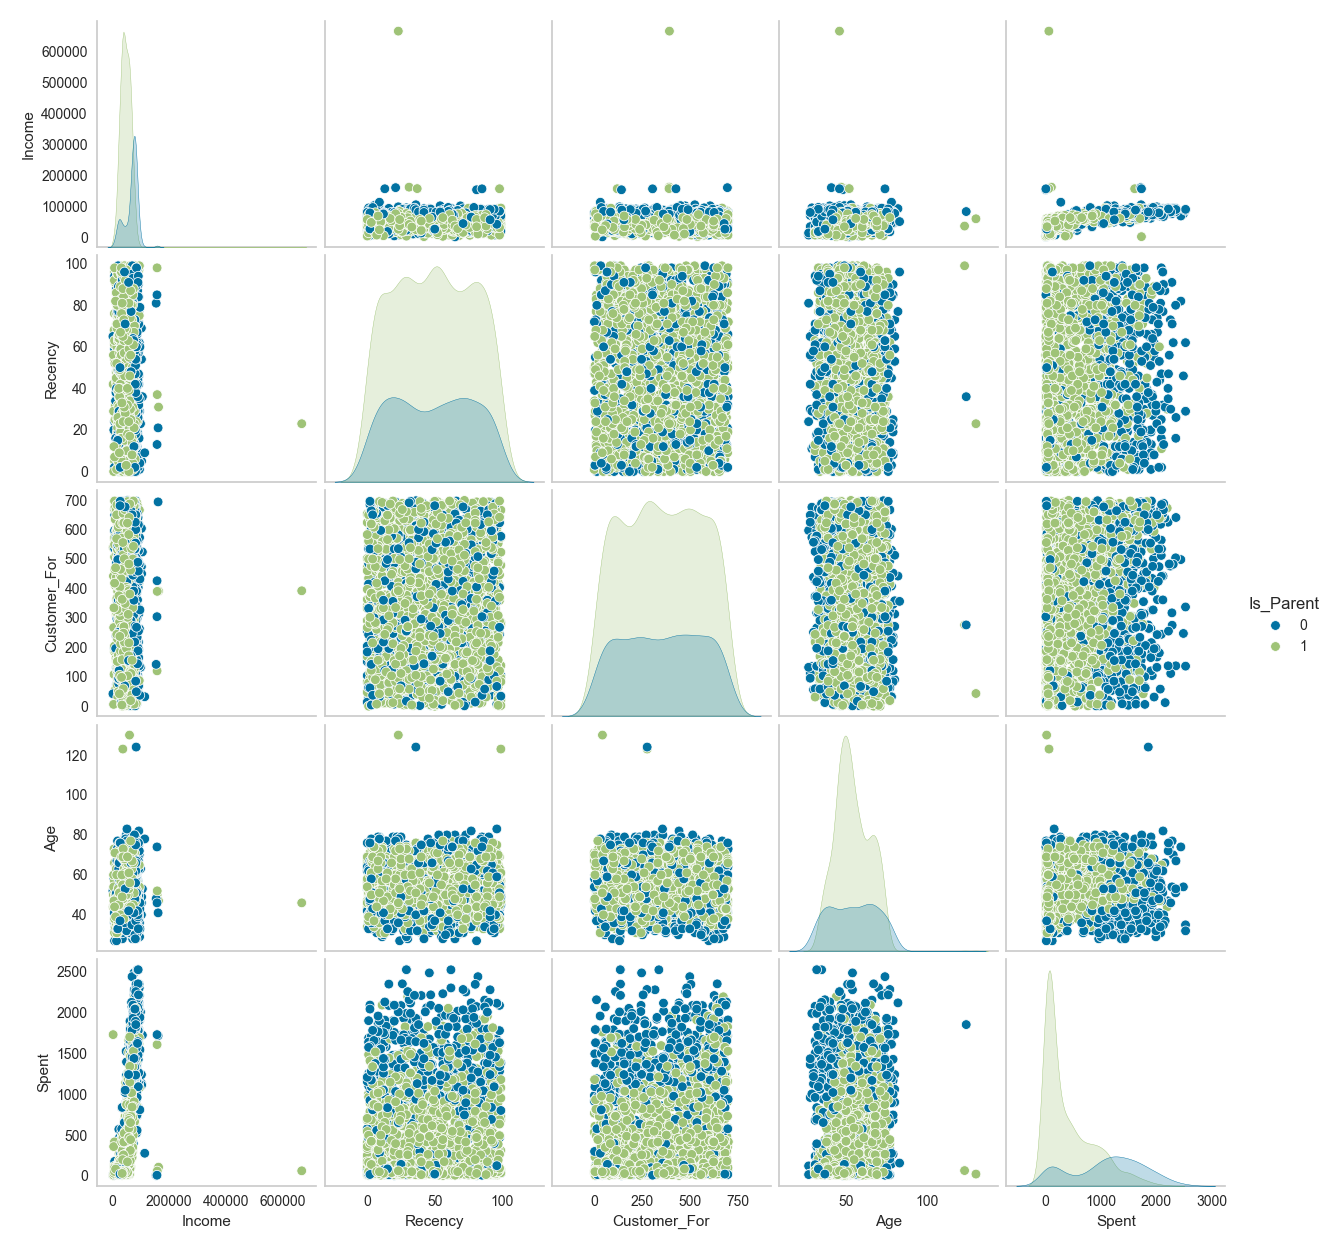

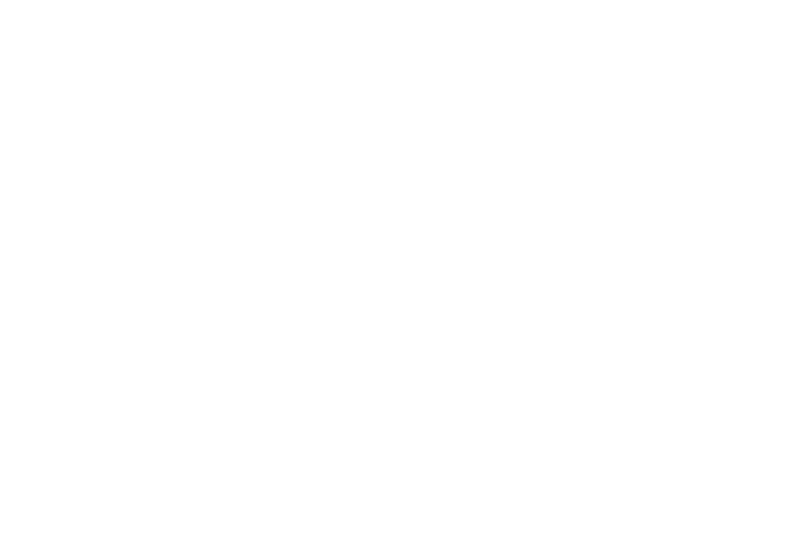

In [45]:
To_Plot = ['Income', "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(data[To_Plot], hue = 'Is_Parent', diag_kind="auto")
plt.grid(False)
plt.show()

In [46]:
"""
There are outliers in Income and Age, so we drop the outliers
"""
data = data[(data['Income'] < 140000) & (data['Age'] < 100)]


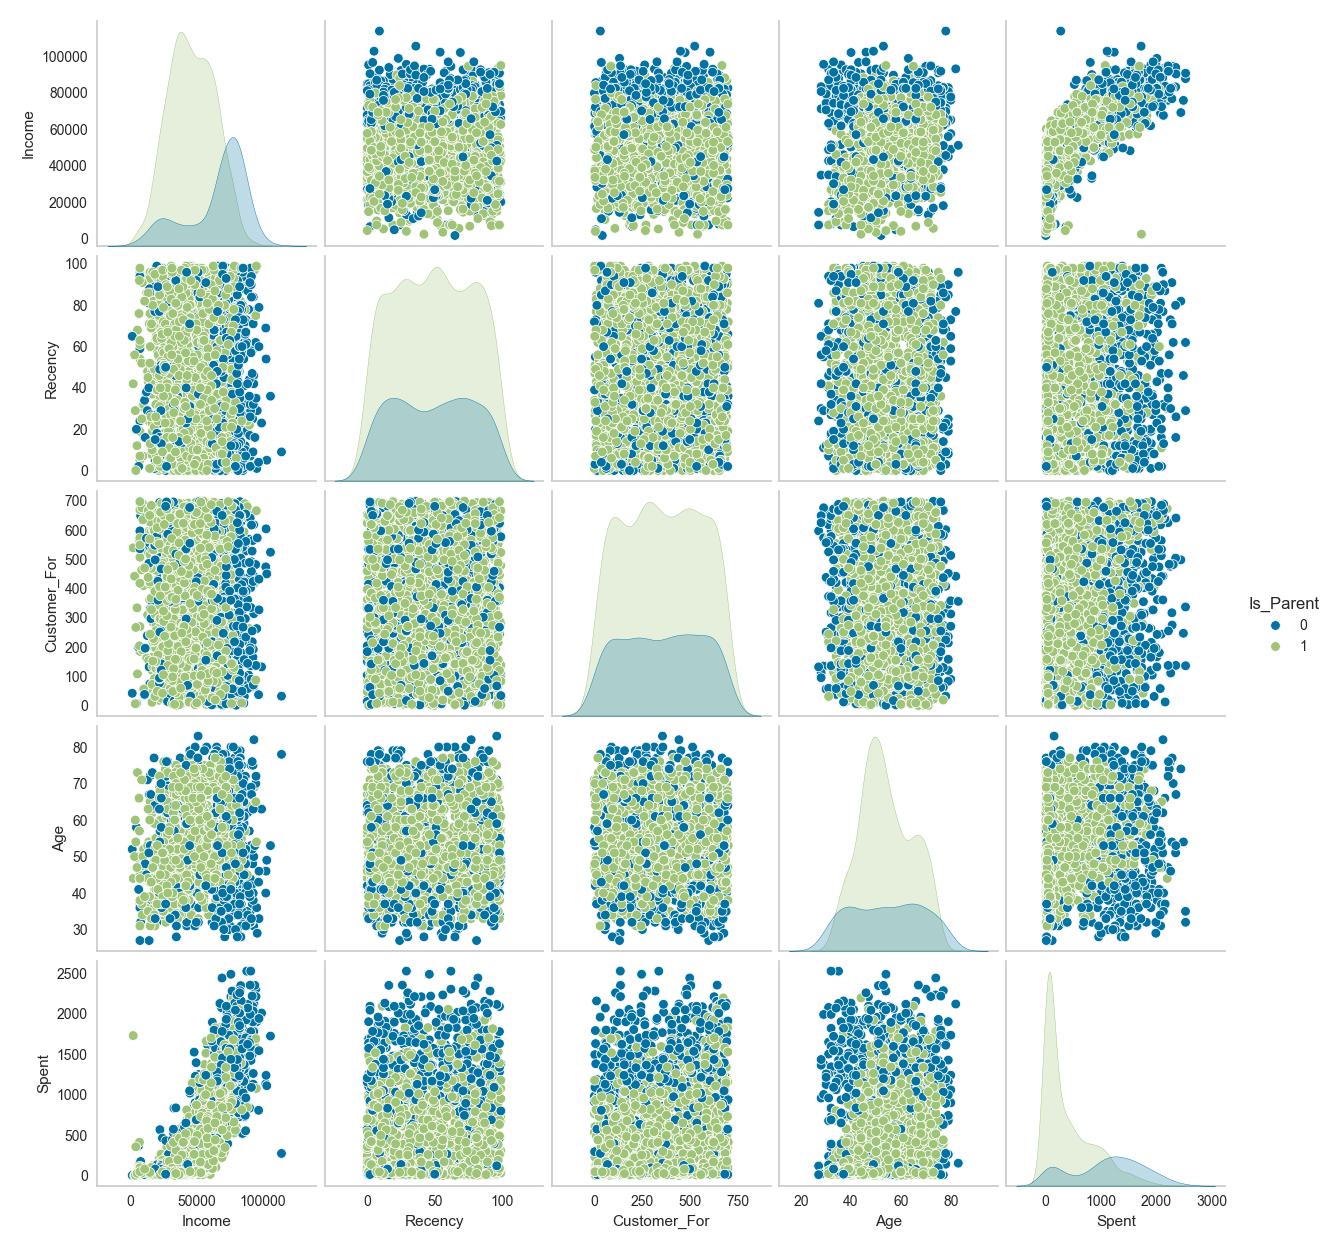

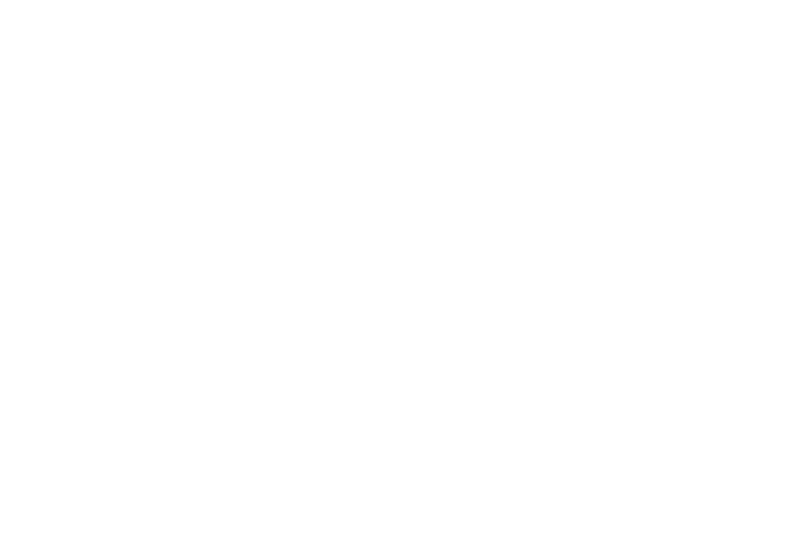

In [47]:
"""
Repeat the graph and check the changes
"""
plt.figure()
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(data[To_Plot], hue = 'Is_Parent', diag_kind="auto")
plt.grid(False)
plt.show()

<Axes: >

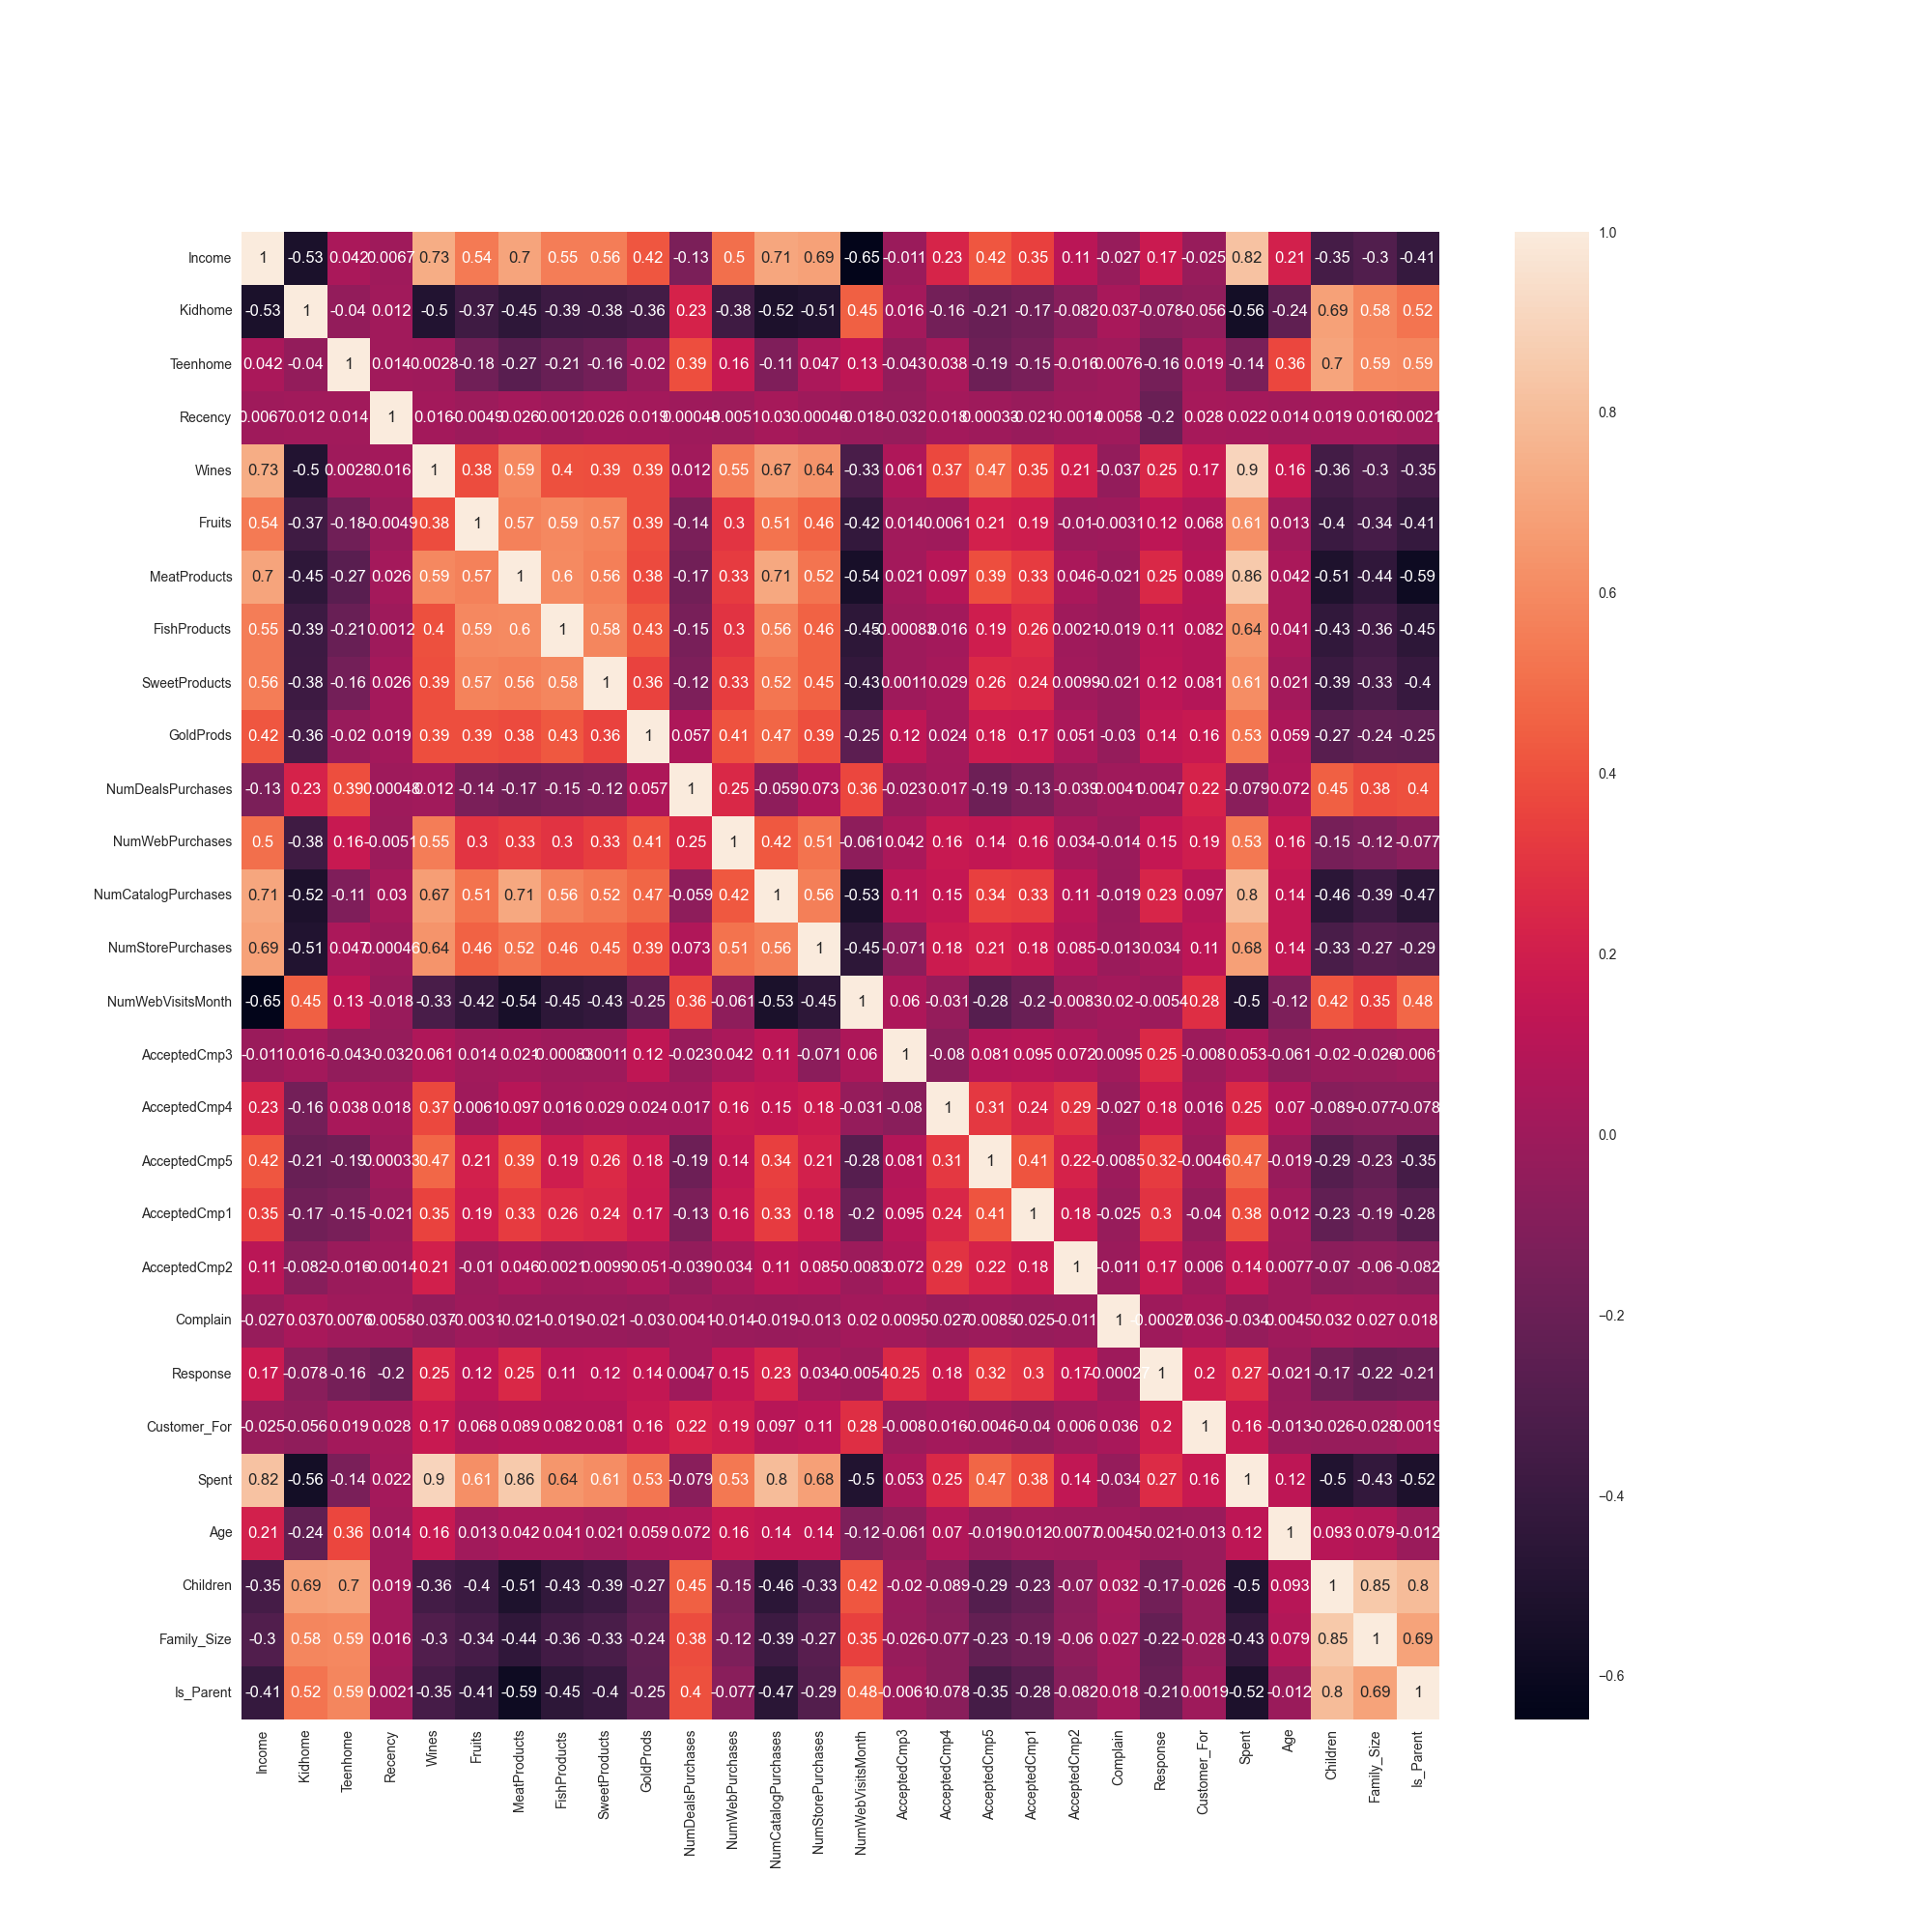

In [48]:
"""
Heatmap for correlation
"""
num_features = list(data.dtypes[data.dtypes != 'object'].index)
cat_features = list(data.dtypes[data.dtypes == 'object'].index)
corr = data[num_features].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

<a id="6"></a>
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">6. DATA PREPROCESSING</p>

In [49]:
# use label encoding for the categorical features
LE = preprocessing.LabelEncoder()
for cat in cat_features:
    data[cat] = LE.fit_transform(data[cat])

In [50]:
# drop deals accpeted & promotions features

cols_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_drop, axis = 1)

# use scaler to transform the 
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)


In [51]:
scaled_data

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0     -0.892338  0.314651 -0.823405 -0.930767  0.310830  0.974566  1.548614   
1     -0.892338 -0.254877  1.038757  0.906602 -0.380600 -0.874776 -0.638664   
2     -0.892338  0.965354 -0.823405 -0.930767 -0.795458  0.355155  0.568110   
3     -0.892338 -1.206087  1.038757 -0.930767 -0.795458 -0.874776 -0.563241   
4      0.571654  0.322136  1.038757 -0.930767  1.555404 -0.394659  0.417263   
...         ...       ...       ...       ...       ...       ...       ...   
2200  -0.892338  0.463624 -0.823405  0.906602 -0.104028  1.193879  0.417263   
2201   0.571654  0.598401  2.900920  0.906602  0.241687  0.295881 -0.663806   
2202  -0.892338  0.258780 -0.823405 -0.930767  1.451690  1.783653  0.542969   
2203   0.571654  0.851004 -0.823405  0.906602 -1.417746  0.361082  0.090428   
2204   0.571654  0.060213  1.038757  0.906602 -0.311457 -0.658427 -0.588382   

      MeatProducts  FishProducts  SweetProducts  ...  NumCatalogPurchases  \
0         1.748400      2.449154       1.480301  ...             2.628526   
1        -0.731678     -0.652345      -0.635399  ...            -0.588043   
2        -0.175957      1.336263      -0.149031  ...            -0.230646   
3        -0.667380     -0.506392      -0.586763  ...            -0.945440   
4        -0.217292      0.150396      -0.003121  ...             0.126750   
...            ...           ...            ...  ...                  ...   
2200      0.076644      0.077420       2.209853  ...             0.126750   
2201     -0.621452     -0.688833      -0.659718  ...            -0.230646   
2202      0.237389     -0.105022      -0.367897  ...             0.126750   
2203      0.223611      0.770696       0.069834  ...             0.841543   
2204     -0.479078     -0.652345      -0.635399  ...            -0.588043   

      NumStorePurchases  NumWebVisitsMonth  Customer_For  Living_With  \
0             -0.562650           0.689203      1.527183    -1.347625   
1             -1.179732          -0.139645     -1.188629    -1.347625   
2              1.288596          -0.554069     -0.205999     0.742046   
3             -0.562650           0.274779     -1.060245     0.742046   
4              0.054432          -0.139645     -0.951612     0.742046   
...                 ...                ...           ...          ...   
2200          -0.562650          -0.139645      0.134712     0.742046   
2201          -0.254109           0.689203     -1.652786     0.742046   
2202           2.214218           0.274779     -0.981239    -1.347625   
2203           1.288596          -0.968493     -0.976302     0.742046   
2204          -0.562650           0.689203      1.324732     0.742046   

         Spent       Age  Children  Family_Size  Is_Parent  
0     1.679323  1.017189 -1.266589    -1.759012   -1.58466  
1    -0.963897  1.273530  1.403420     0.448513    0.63105  
2     0.281242  0.333612 -1.266589    -0.655250   -1.58466  
3    -0.920675 -1.289883  0.068415     0.448513    0.63105  
4    -0.307248 -1.033542  0.068415     0.448513    0.63105  
...        ...       ...       ...          ...        ...  
2200  1.220500  0.162718  0.068415     0.448513    0.63105  
2201 -0.270675  1.957107  2.738424     2.656038    0.63105  
2202  1.054260 -1.033542 -1.266589    -1.759012   -1.58466  
2203  0.392623  1.102636  0.068415     0.448513    0.63105  
2204 -0.722849  1.273530  1.403420     1.552276    0.63105  

[2205 rows x 23 columns]

<a id="7"></a>
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">7. DIMENSION REDUCTION</p>

Here use PCA to reduce dimensionality (to 3D)

In [52]:
# use PCA
pca = PCA(n_components=3)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_data), columns = (['pca1', 'pca2', 'pca3']))
PCA_ds.describe()

pca1          pca2          pca3
count  2.205000e+03  2.205000e+03  2.205000e+03
mean  -6.444832e-18  7.733798e-17 -3.182136e-17
std    2.902887e+00  1.715289e+00  1.231036e+00
min   -6.056708e+00 -4.197503e+00 -3.641692e+00
25%   -2.564458e+00 -1.326110e+00 -8.545820e-01
50%   -7.845012e-01 -1.759685e-01 -6.101486e-02
75%    2.413098e+00  1.235229e+00  8.579551e-01
max    7.518042e+00  6.190931e+00  6.874008e+00

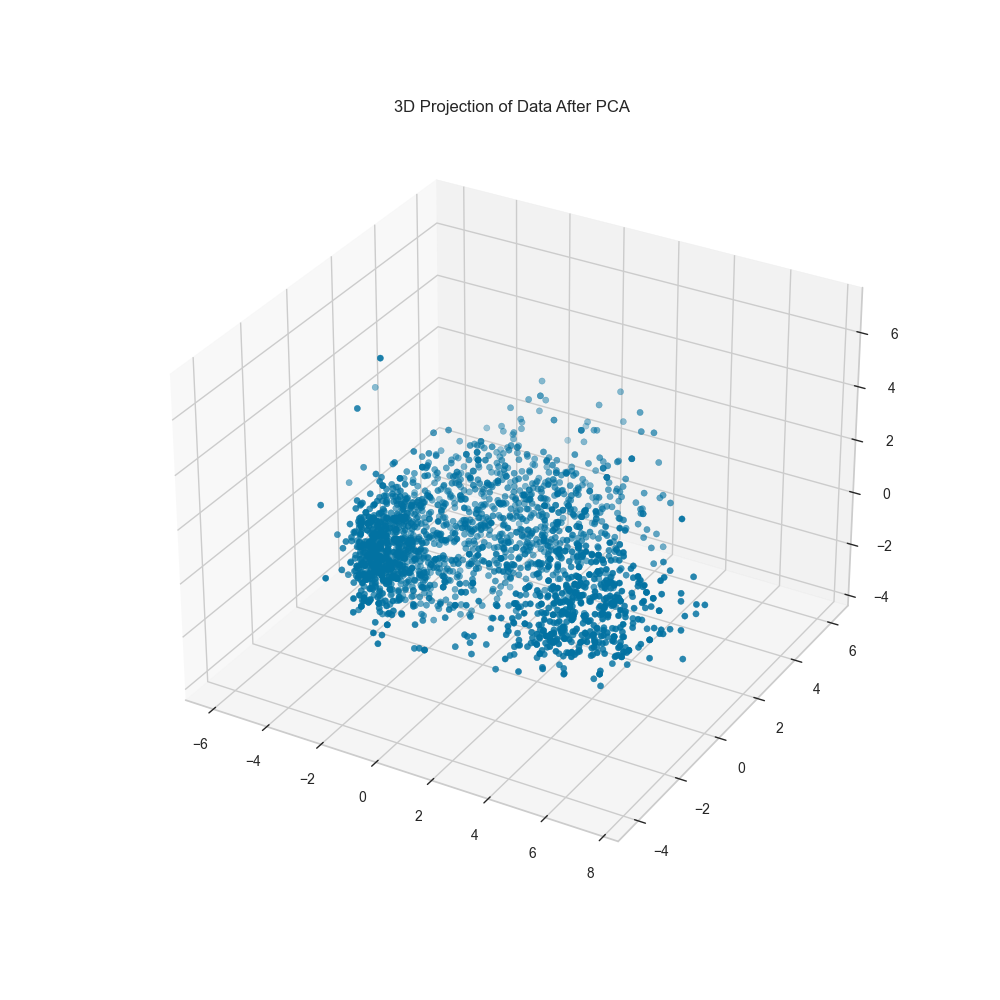

In [53]:
x_axis = PCA_ds["pca1"]
y_axis = PCA_ds["pca2"]
z_axis = PCA_ds["pca3"]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_axis, y_axis, z_axis, marker="o")
ax.set_title("3D Projection of Data After PCA")
plt.show()



<a id="7"></a>
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">8. CLUSTERING</p>

use Kmeans

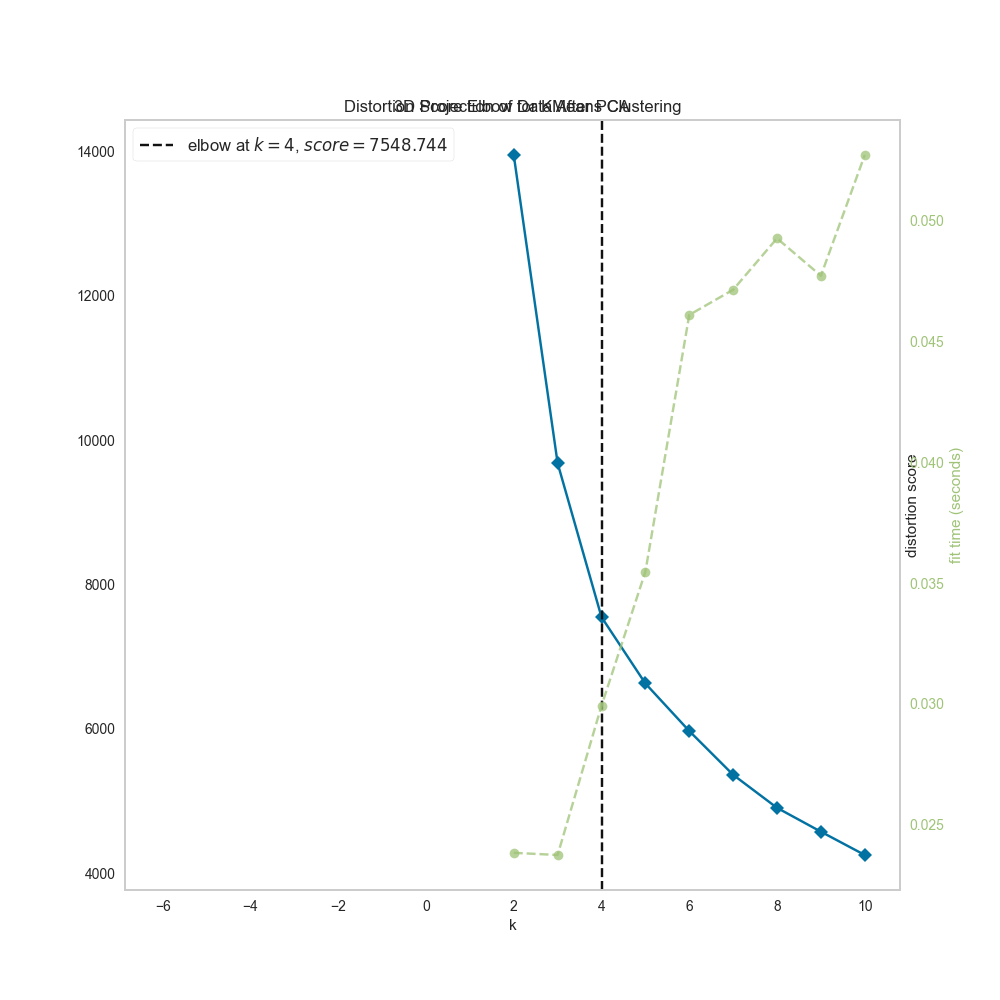

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_ds)        # Fit the data to the visualizer
visualizer.show() 


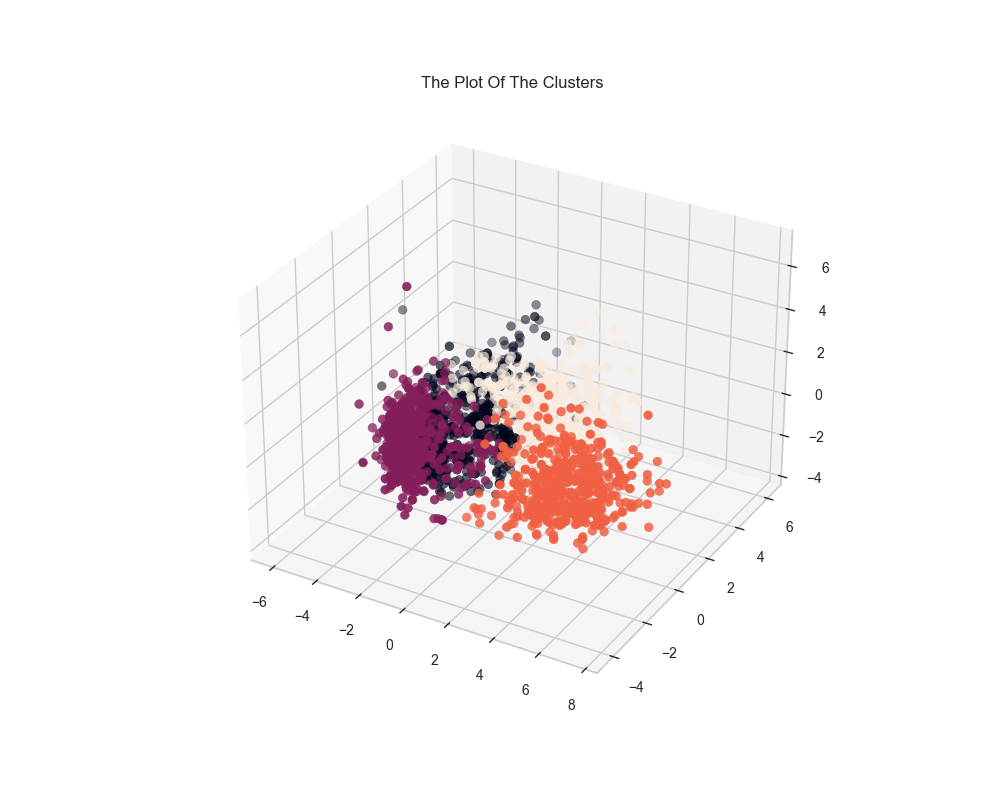

In [57]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x_axis, y_axis, z_axis, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()